In [1]:
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy.stats import zscore

In [2]:
df = pd.read_csv("football.csv")

In [3]:
df.head()

,Key,Team,League,Season,Rank,Games,Wins,Draws,Losses,Points,...,Nutmegs,Controlled,DistMovedWithBall,ProgressiveDistMoved,ProgC,ProgressiveIntoFinalThird,ProgressiveInto18Yard,Miscontrols,MiscontrolsAfterTackle,ProgressivePassReceived
0,Chelsea DL 2009/2010,Chelsea,Premier League,2009/2010,1.0,38.0,27.0,5.0,6.0,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Manchester United DL 2009/2010,Manchester United,Premier League,2009/2010,2.0,38.0,27.0,4.0,7.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tottenham DL 2009/2010,Tottenham,Premier League,2009/2010,4.0,38.0,21.0,7.0,10.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arsenal DL 2009/2010,Arsenal,Premier League,2009/2010,3.0,38.0,23.0,6.0,9.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aston Villa DL 2009/2010,Aston Villa,Premier League,2009/2010,6.0,38.0,17.0,13.0,8.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Add start and end of the Season

In [4]:
df["Start Season"] = df["Season"].apply(lambda x : int(x[:4]))
df["End Season"] = df["Season"].apply(lambda x : (x[5:]))

In [5]:
pl = df[(df["League"] == "Premier League") & (df["Rank"] == 1)][["League","Team","Start Season", "End Season","Points","Wins"]].reset_index(drop = True)

In [6]:
ll = df[(df["League"] == "La Liga") & (df["Rank"] == 1)][["League","Team","Start Season", "End Season","Points","Wins"]].reset_index(drop = True)

# T-Test Points

## 2009 - 2022

In [7]:
pg.ttest(ll.Points.values, pl.Points.values, correction = False, alternative = 'greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.170357,24,greater,0.126674,"[-1.24, inf]",0.459052,1.198,0.305916


## 2009 - 2015

In [8]:
pg.ttest(ll[ll["Start Season"] < 2015].Points.values, pl[pl["Start Season"] < 2015].Points.values, correction = False, alternative = 'greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.883252,10,greater,0.000319,"[6.5, inf]",2.819347,79.794,0.997999


## 2015 - 2022

In [9]:
pg.ttest(ll[ll["Start Season"] >= 2015].Points.values, pl[pl["Start Season"] >= 2015].Points.values, correction = False, alternative = 'greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.308666,12,greater,0.892422,"[-9.11, inf]",0.699512,0.652,0.001963


### **Results are not reliable since we have few samples. At least needed 30 samples.**

### But what if all of our samples are already **normal**?

In [10]:
print(f'''LaLiga Winner Points in 2009-2022 are normal -> {pg.normality(ll.Points.values)["normal"].values[0]}''')
print(f'''LaLiga Winner Points in 2009-2015 are normal -> {pg.normality(ll[ll["Start Season"] < 2015].Points.values)["normal"].values[0]}''')
print(f'''LaLiga Winner Points in 2015-2022 are normal -> {pg.normality(ll[ll["Start Season"] >= 2015].Points.values)["normal"].values[0]}''')

LaLiga Winner Points in 2009-2022 are normal -> True
LaLiga Winner Points in 2009-2015 are normal -> True
LaLiga Winner Points in 2015-2022 are normal -> False


In [11]:
print(f'''Premier League Winner Points in 2009-2022 are normal -> {pg.normality(pl.Points.values)["normal"].values[0]}''')
print(f'''Premier League Winner Points in 2009-2015 are normal -> {pg.normality(pl[pl["Start Season"] < 2015].Points.values)["normal"].values[0]}''')
print(f'''Premier League Winner Points in 2015-2022 are normal -> {pg.normality(pl[pl["Start Season"] >= 2015].Points.values)["normal"].values[0]}''')

Premier League Winner Points in 2009-2022 are normal -> True
Premier League Winner Points in 2009-2015 are normal -> True
Premier League Winner Points in 2015-2022 are normal -> True


**Since LaLiga and Premier League Winner Points are both normal in range 2009-2022, so the result with pvalue 0.126674 is reliable.**

Hey La Liga! Your Winner Points are not normal from 2015 until now. Do you think it's good or is it an issue?

# Z-Score

<AxesSubplot:ylabel='Count'>

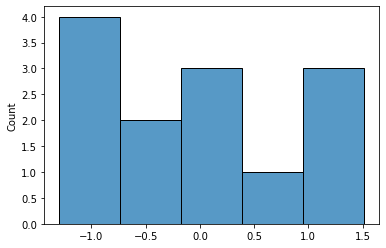

In [14]:
sns.histplot(zscore(ll.Points.values))

<AxesSubplot:ylabel='Count'>

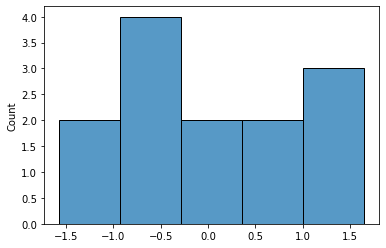

In [15]:
sns.histplot(zscore(pl.Points.values))